# Investment Analysis for Spark Funds


***

### What is the business objective ?

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

### Checkpoint 1: Data Cleaning

#### 1.1 Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns             
import matplotlib.pyplot as plt
%matplotlib inline     

pd.set_option('mode.chained_assignment', None)

#### 1.2 Loading the data into dataframe & Data Cleaning

In [2]:
# Read the companies file, fix the encoding issue and explore the data
companies = pd.read_csv("companies.csv", encoding='unicode_escape')
# Read the rounds file and explore the data
rounds2 = pd.read_csv("rounds2.csv", encoding='unicode_escape')
# Read the mappings.csv file to map the primary sectors to one ofthe main sectors.
reference_mapping = pd.read_csv("mapping.csv")

In [3]:
# Display the top 5 rows 
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# Display the last 5 rows 
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [5]:
# permalink and name has got some unnecessary non-ascii values
companies["permalink"] = companies.permalink.str.encode("ascii", "ignore").str.decode("ascii")
companies["name"] = companies.name.str.encode("ascii", "ignore").str.decode("ascii")
# Checking the dataframe for confirmation
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display the top 5 rows 
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
# Display the last 5 rows 
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [8]:
# company_permalink has got some unnecessary non-ascii values
rounds2["company_permalink"] = rounds2.company_permalink.str.encode("ascii", "ignore").str.decode("ascii")
# Checking the dataframe for confirmation
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


#### 1.3 Checking the types of data

In [9]:
print(companies.dtypes)
print()
print(companies.count())

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

permalink        66368
name             66367
homepage_url     61310
category_list    63220
status           66368
country_code     59410
state_code       57821
region           58338
city             58340
founded_at       51147
dtype: int64


In [10]:
print(rounds2.dtypes)
print()
rounds2.count()

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object



company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
dtype: int64

#### 1.4 Understand the Data Set 

In [11]:
# How many unique companies are present in rounds2?

# Converting company_permalink column into a lower case as the values are in mixed case
rounds2["company_permalink"] = rounds2.company_permalink.str.lower()
rounds2.company_permalink.nunique()

# Ans: 66368

66368

In [12]:
# How many unique companies are present in companies?

# Converting permalink column into a lower case as the values are in mixed case
companies["permalink"] = companies.permalink.str.lower()
len(companies.permalink.unique())

# Ans: 66368

66368

Qn: In the companies data frame, which column can be used as the unique key for each company?
<br>
Ans: permalink

In [13]:
# Are there any companies in the rounds2 file which are not present in companies?

# Method 1 : Comparing the two arrays to check whether all companies are present
(rounds2.company_permalink.unique() == companies.permalink.unique()).all()

# Ans: N

True

In [14]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.

# Merge companies dataframe into rounds2 with a left join
master_frame = pd.merge(rounds2, companies, how="left", left_on="company_permalink", right_on="permalink")
master_frame.count()

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
permalink                  114949
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

#### 1.5 Handle Null values and remove un-necessary rows/columns if any

In [15]:
# Getting information about all columns in the dataframe
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [16]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [17]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [18]:
# summing up the missing values (row-wise)
master_frame.isnull().sum(axis=1)

0         1
1         1
2         1
3         5
4         0
         ..
114944    1
114945    1
114946    6
114947    1
114948    6
Length: 114949, dtype: int64

In [19]:
# Check whether any row having all missing values
master_frame.isnull().all(axis=1).sum()

0

In [20]:
# Checking the percentage of missing columns in the dataset
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

Now, we have two options, either retain or delete the missing columns. But if we need to retain these columns, then we have an additional overhead of treating missing rows. And deleting rows mostly leads to lose data.
<br>
We may also have to think about the analysis that we are doing, targeted variables and also the need of these columns in our analysis.
<br>
Based on the percentage of missing values, we can remove ```funding_round_code```, ```homepage_url```, ```state_code```, ```region```, ```city``` and ```founded_at```.
- We can't remove;
    - ```raised_amount_usd``` because we need to get the total investment about it made to do our analysis.
    - ```country_code``` because we need the best English speaking countries to invest.
- We can remove;
    - ```funding_round_permalink``` because it doesn't help us in our analysis.
    - ```permalink``` because the unique values between this column and ```company_permalink``` are same.
    

In [21]:
# Removing the columns which are not useful
master_frame = master_frame.drop(
    [
        "funding_round_code", "homepage_url", "state_code",
        "region", "city", "founded_at",
        "funding_round_permalink", "permalink"
    ], axis=1
)

In [22]:
# Re-checking the percentage of missing columns in the dataset to confirm the drop
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
funded_at              0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
status                 0.00
country_code           7.55
dtype: float64

In [23]:
# Checking the summary stats for column raised_amount_usd
master_frame.raised_amount_usd.describe().apply("{0:.2f}".format)

count          94959.00
mean        10426869.33
std        114821247.98
min                0.00
25%           322500.00
50%          1680511.00
75%          7000000.00
max      21271935000.00
Name: raised_amount_usd, dtype: object

It seems like the mean value, ~10 M and median value, ~1 M is very different, and min, max and quartile values has got huge difference, so it won't be a suitable approach if we replace the missing ones with Mean or Median values

In [24]:
# Checking the stats for column country_code
print(master_frame.country_code.value_counts())
master_frame.country_code.value_counts().head(20)

USA    72308
GBR     5966
CAN     3115
CHN     2693
IND     2233
       ...  
DZA        1
QAT        1
BRB        1
BRN        1
UZB        1
Name: country_code, Length: 137, dtype: int64


USA    72308
GBR     5966
CAN     3115
CHN     2693
IND     2233
DEU     1751
FRA     1650
ISR     1631
ESP     1235
AUS      759
IRL      726
NLD      725
SGP      721
BRA      702
SWE      675
RUS      672
JPN      642
ITA      584
CHE      565
KOR      535
Name: country_code, dtype: int64

There is only about ```7%``` of missing data in **country_code**, so we can delete those missing ones as we have enough data for the countries compared to the missing ones.

In this case, a row can have a maximum of 3 null values because only three columns namely ```raised_amount_usd```, ```category_list```, ```country_code``` has null values.

In [25]:
# Count the no.of rows having 3 missing values
len(master_frame[master_frame.isnull().sum(axis=1) ==  3].index)

1206

In [26]:
# 1206 rows contains 3 null values in the dataset.
# Calculate the percentage of rows which contains the 3 or more null values
round(len(master_frame[master_frame.isnull().sum(axis=1) ==  3].index) / len(master_frame.index) * 100, 2)

1.05

It constitues around only ```1%``` of data set which contains three null values, and it seems like all the columns which have null values are the columns which will affect our analysis, so removing null values makes more sense here

In [27]:
# Count the no.of rows having 1 or greater than 1 missing values
len(master_frame[master_frame.isnull().sum(axis=1) >=  1].index)

26421

In [28]:
# 26421 rows contains 1 or more null values in the dataset.
# Calculate the percentage of rows which contains the 1 or more null values
round(len(master_frame[master_frame.isnull().sum(axis=1) >=  1].index) / len(master_frame.index) * 100, 2)

22.98

In [29]:
# Retaining the rows only havig no null values in the dataset
master_frame = master_frame[master_frame.isnull().sum(axis=1) < 1]

In [30]:
# Looking at the summary of the dataset for the missing columns 
round(100 * (master_frame.isnull().sum() / len(master_frame.index)), 2)

company_permalink     0.0
funding_round_type    0.0
funded_at             0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64

We now have a dataframe which contains no missing values. We can now analyse how many rows or percentage of rows we have lost during this Data cleaning. Original master_frame dataset row count: 114949

In [31]:
master_frame.shape

(88528, 8)

**Qn from Table 1.1**: How many observations are present in master_frame?
<br>
Ans: 88528

In [32]:
# Percentage of rows that we have after cleaning the dataset for missing values
round(100 * (len(master_frame.index) / 114949), 2)

77.02

Thus we have lost around ```22.98%``` observations in cleaning the dataset for missing values.
***

### Checkpoint 2: Funding Type Analysis

**Statement**: Spark Funds wants to choose one of these four investment types for each potential investment they will make.
<br>
- ```venture```
- ```angel```
- ```seed```
- ```private_equity```

#### 2.1 Analyse the funding_round_type column

In [33]:
# Get all the various funding types available in the dataset
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21094
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [34]:
# Remove all other rows which doesn't belong to the four investment types where Spark Funds want to invest.
master_frame = master_frame[master_frame.funding_round_type.isin(["venture", "angel", "seed", "private_equity"])]

#### 2.2 Find the investment type which suits the best for Sparks Fund

In [35]:
# Get the summary stats for the column raised_amount_usd
master_frame.raised_amount_usd.describe().apply("{0:.2f}".format)

count          75123.00
mean         9519601.39
std         77928292.94
min                0.00
25%           470810.50
50%          2000000.00
75%          8000000.00
max      17600000000.00
Name: raised_amount_usd, dtype: object

In [36]:
# Get the summary stats for the column raised_amount_usd across different funding types
master_frame.pivot_table(values="raised_amount_usd", columns="funding_round_type", aggfunc=[np.mean, np.median]).stack().style.format("{:,.2f}")

The answer for the most suitable investment type will depend on the **representative value** of the investment amount for each of the four funding types. The most representative value of a group of data  is the **median** here as the mean value and median values are having a huge difference based on the summary.

In [37]:
# Calculate the most representative value of the investment amount for each investment type.

# We can group by the dataframe on the funding type and calculate the median of raised amount.
round(master_frame.groupby(by="funding_round_type").raised_amount_usd.median(), 2).apply("{0:.2f}".format)

funding_round_type
angel               414906.00
private_equity    20000000.00
seed                300000.00
venture            5000000.00
Name: raised_amount_usd, dtype: object

These are the most representative value of the amount for each investment type (in approx millions)
- angel:  ~2 M USD
- private_equity: ~20 M USD
- seed: ~2.7 M USD
- venture: ~5 M USD

<br>
Challenge: What is the most suitable investment type provided they want to invest 5 to 15 million USD per investment ?
<br>

Solution: **Venture funding** is the most suitable one in this situation as it is the only investment type which lies between the desired investment amount by the company.

In [38]:
# Qn from Table: Average funding amount of funding types
round(master_frame.groupby(by="funding_round_type").raised_amount_usd.mean(), 2).apply("{0:.2f}".format)

funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747827.95
venture           11724222.69
Name: raised_amount_usd, dtype: object

In [39]:
# Get a copy of the dataframe with all the four funding types for plot representation.
all_funding_types_df = master_frame

In [40]:
# Filtering the master data to contain only the chosen investment type
master_frame = master_frame[master_frame.funding_round_type == "venture"]

In [41]:
master_frame.tail()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
114931,/organization/zyraz-technology,venture,09-10-2009,7991547.0,Zyraz Technology,Biotechnology,closed,MYS
114934,/organization/zyrra,venture,18-10-2012,140500.0,Zyrra,E-Commerce,operating,USA
114936,/organization/zystor,venture,16-12-2004,8500000.0,Zystor,Biotechnology,acquired,USA
114937,/organization/zytoprotec,venture,29-01-2013,2686600.0,Zytoprotec,Biotechnology,operating,AUT
114941,/organization/zznode-science-and-technology-co...,venture,01-04-2012,1587301.0,ZZNode Science and Technology,Enterprise Software,operating,CHN


***

### Checkpoint 3: Country Analysis

**Statement**: Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type

#### 3.1 Analyse the dataframe and identify the top nine countries with the higheset total funding

In [42]:
# Group the dataframe based on country code, and get the total sum of inevestments for each country
master_frame.groupby(by="country_code").raised_amount_usd.sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64

In [43]:
# The raised_amount_usd becomes very high, so we are converting it into million scale
master_frame["raised_amount_usd"] = master_frame.raised_amount_usd / 1000000

In [44]:
# Getting the aggregate sum again after converting it into million scale
country_wise_df = master_frame.groupby(by="country_code").raised_amount_usd.sum().sort_values(ascending=False)
country_wise_df

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
           ...      
MCO         0.657000
SAU         0.500000
CMR         0.359561
GTM         0.300000
MMR         0.200000
Name: raised_amount_usd, Length: 97, dtype: float64

In [45]:
# Create a new dataframe with only the top 9 countries having maximum investment
top9 = country_wise_df.iloc[:9, ].reset_index()
top9

,country_code,raised_amount_usd
0,USA,420068.029342
1,CHN,39338.918773
2,GBR,20072.813004
3,IND,14261.508718
4,CAN,9482.217668
5,FRA,7226.851352
6,ISR,6854.350477
7,DEU,6306.921981
8,JPN,3167.647127


#### 3.2 Get the list of English speaking countries and filter the top 9 countries based on that list

In [46]:
# Libraries for web-scrapping
import requests
from bs4 import BeautifulSoup

In [47]:
# Get the url for the list of english speaking countries
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"

# Get the table from the wikipedia and get the table rows and values
alpha_3_code = []
result = requests.get(url)
soup = BeautifulSoup(result.text,"lxml")
# Only the first two tables are required which contains alpha-3-code
tables = soup.find_all(class_="wikitable sortable")[:2]
for table in tables:
    for table_info in table.find_all("tr")[1:]:
        data = table_info.find_all("td")[2].get_text(strip=True)
        alpha_3_code.append(data)
        

In [48]:
# Create a new column to identify whether a country is English speaking or not.
top9["English_Speaking"] = top9.country_code.apply(lambda x: "Yes" if x in alpha_3_code else "No")
top9

,country_code,raised_amount_usd,English_Speaking
0,USA,420068.029342,Yes
1,CHN,39338.918773,No
2,GBR,20072.813004,Yes
3,IND,14261.508718,Yes
4,CAN,9482.217668,Yes
5,FRA,7226.851352,No
6,ISR,6854.350477,No
7,DEU,6306.921981,No
8,JPN,3167.647127,No


In [49]:
# Get the top three English-speaking countries in the data frame
top9[top9.English_Speaking == "Yes"][["country_code", "raised_amount_usd"]].iloc[:3, ]

,country_code,raised_amount_usd
0,USA,420068.029342
2,GBR,20072.813004
3,IND,14261.508718


***

### Checkpoint 4: Sector Analysis 1

#### 4.1 Analyse the dataframe for sector analysis

In [50]:
# Limit the master_frame to contain only the top three English speaking countries for further analysis

master_frame = master_frame[master_frame.country_code.isin(["USA", "GBR", "IND"])]
master_frame.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,05-01-2015,10.0,#fame,Media,operating,IND
10,/organization/0xdata,venture,09-11-2015,20.0,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,venture,03-01-2013,1.7,H2O.ai,Analytics,operating,USA
12,/organization/0xdata,venture,19-07-2014,8.9,H2O.ai,Analytics,operating,USA
22,/organization/1-mainstream,venture,17-03-2015,5.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA


In [51]:
# Replace the category_list with a primary sector value for those having vertical bar (sub-sectors included in it)
master_frame.category_list = master_frame.category_list.apply(lambda x: x.split("|")[0])

In [52]:
# Get the top 5 rows to understand the columns
reference_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [53]:
# Remove the NaN value from the row
reference_mapping.dropna(inplace=True)

# Checking the types and count of data
reference_mapping.count()

category_list                              687
Automotive & Sports                        687
Blanks                                     687
Cleantech / Semiconductors                 687
Entertainment                              687
Health                                     687
Manufacturing                              687
News, Search and Messaging                 687
Others                                     687
Social, Finance, Analytics, Advertising    687
dtype: int64

There are some entries in the catalog_list which contains "0" instead of "na". We need to handle that here.
Note: This was actually identified later in the process, but replacing those values here.

In [54]:
# Get the rows where category_list contains "0" in it which is wrong.
reference_mapping[reference_mapping.category_list.str.contains("0")]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


In [55]:
# Replace the "0" with "na" issue with the wrong entry in the column
reference_mapping.category_list.replace(to_replace={"0": "na"}, regex=True,inplace=True)

# There are certain values where "0" comes in the start of the word
# Fixing the string representation to be title
reference_mapping.category_list = reference_mapping.category_list.str.title()

In [56]:
# Map the column name which represents the main sector as a separate column against the primary sectors
reference_mapping["main_sector"] = reference_mapping.apply(lambda x: reference_mapping.columns[x == 1].item(), axis = 1)

In [57]:
# drop all other columns expect the category and main sector
reference_mapping = reference_mapping[["category_list", "main_sector"]]

In [58]:
# Fixing the string representation to be title for category_list in master_frame also for consistency.
master_frame.category_list = master_frame.category_list.str.title()

In [59]:
# Fixing the issue with entry for 2.Na which got introduced previously
reference_mapping.category_list.replace(to_replace="2.Na", value="2.0", regex=True,inplace=True)

In [60]:
# Merge the mapping frame onto the master_frame to get the corresponding main_sector against each primary_sector in master frame
master_frame = master_frame.merge(reference_mapping,on="category_list", how="left")

In [61]:
# Check for null values in the master_frame after merge
master_frame.isnull().sum()

company_permalink      0
funding_round_type     0
funded_at              0
raised_amount_usd      0
name                   0
category_list          0
status                 0
country_code           0
main_sector           11
dtype: int64

In [62]:
# The primary_sectors which are not mapped to the main_sector based on the mappings file.
master_frame[master_frame.main_sector.isnull()].category_list.unique()

array(['Natural Gas Uses', 'Adaptive Equipment', 'Racing',
       'Specialty Retail', 'Biotechnology And Semiconductor',
       'Rapidly Expanding', 'Product Search', 'Greentech', 'Retirement'],
      dtype=object)

In [63]:
# Removing the entries which contains null values for main_sector after merging
master_frame = master_frame[~master_frame.main_sector.isnull()]

***

### Checkpoint 5: Sector Analysis 2

#### 5.1 Analyse the dataframe to get the heavily invested sectors across countries

**Statement**: Find out the most heavily invested main sectors in each of the three countries.

We now need to filter the master_frame to three subsets which contains;
  - Each of three top English speaking countries
  - Each of the funding type along with the main sectors
  - Funding type investment should be between 5 and 15 Million USD

In [64]:
# Create D1 with country USA, and investment between 5 and 15 million USD
D1 = master_frame[(master_frame.country_code == "USA") & (master_frame.raised_amount_usd.between(5, 15))]
D1.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,main_sector
3,/organization/0xdata,venture,19-07-2014,8.900000,H2O.ai,Analytics,operating,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,17-03-2015,5.000000,1 Mainstream,Apps,acquired,USA,"News, Search and Messaging"
17,/organization/128-technology,venture,16-12-2014,11.999347,128 Technology,Service Providers,operating,USA,Others
20,/organization/1366-technologies,venture,15-10-2013,15.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing
21,/organization/1366-technologies,venture,09-04-2015,5.000000,1366 Technologies,Manufacturing,operating,USA,Manufacturing


In [65]:
# Create D2 with country GBR, and investment between 5 and 15 million USD
D2 = master_frame[(master_frame.country_code == "GBR") & (master_frame.raised_amount_usd.between(5, 15))]
D2.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,main_sector
108,/organization/365scores,venture,29-09-2014,5.500000,365Scores,Android,operating,GBR,"Social, Finance, Analytics, Advertising"
232,/organization/7digital,venture,01-01-2008,8.468328,7digital,Content Creators,acquired,GBR,Entertainment
233,/organization/7digital,venture,19-10-2012,10.000000,7digital,Content Creators,acquired,GBR,Entertainment
256,/organization/90min,venture,06-10-2015,15.000000,90min,Media,operating,GBR,Entertainment
257,/organization/90min,venture,07-05-2013,5.800000,90min,Media,operating,GBR,Entertainment


In [66]:
# Create D3 with country IND, and investment between 5 and 15 million USD
D3 = master_frame[(master_frame.country_code == "IND") & (master_frame.raised_amount_usd.between(5, 15))]
D3.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,main_sector
0,/organization/-fame,venture,05-01-2015,10.000000,#fame,Media,operating,IND,Entertainment
55,/organization/21diamonds-india,venture,15-11-2012,6.369507,21Diamonds,E-Commerce,operating,IND,Others
276,/organization/a-little-world,venture,09-09-2008,6.410000,A LITTLE WORLD,Finance,operating,IND,"Social, Finance, Analytics, Advertising"
926,/organization/adlabs-imagica,venture,28-10-2014,8.180000,Adlabs Imagica,Entertainment,operating,IND,Entertainment
1262,/organization/agile,venture,01-05-2011,5.740000,Agile,Finance,operating,IND,"Social, Finance, Analytics, Advertising"


In [67]:
# For D1, get the total number and total investment amount across main sector
investment_sector_D1_grp = D1.groupby(by="main_sector").agg({"raised_amount_usd": np.sum, "main_sector": "count"})
investment_sector_D1_grp.columns = ["Total_raised_amount_usd", "Total_main_sector"]

In [68]:
# For D2, get the total number and total investment amount across main sector
investment_sector_D2_grp = D2.groupby(by="main_sector").agg({"raised_amount_usd": np.sum, "main_sector": "count"})
investment_sector_D2_grp.columns = ["Total_raised_amount_usd", "Total_main_sector"]

In [69]:
# For D3, get the total number and total investment amount across main sector
investment_sector_D3_grp = D3.groupby(by="main_sector").agg({"raised_amount_usd": np.sum, "main_sector": "count"})
investment_sector_D3_grp.columns = ["Total_raised_amount_usd", "Total_main_sector"]

In [70]:
# Merging the grouped dataset for D1 across main_sector into D1 get all column details
D1 = pd.merge(D1, investment_sector_D1_grp, how="left", on="main_sector")

In [71]:
# Merging the grouped dataset for D2 across main_sector into D2 get all column details
D2 = pd.merge(D2, investment_sector_D2_grp, how="left", on="main_sector")

In [72]:
# Merging the grouped dataset for D3 across main_sector into D3 get all column details
D3 = pd.merge(D3, investment_sector_D3_grp, how="left", on="main_sector")

#### 5.2 Sector-wise Investment Analysis

In [73]:
# Total number of investments 

# USA
print(D1.raised_amount_usd.count())
# GBR
print(D2.raised_amount_usd.count())
# IND
print(D3.raised_amount_usd.count())

12063
621
328


In [74]:
# Total amount of investments 

# USA
print(round(D1.raised_amount_usd.sum(), 2))
# GBR
print(round(D2.raised_amount_usd.sum(), 2))
# IND
print(round(D3.raised_amount_usd.sum(), 2))

107757.1
5379.08
2949.54


In [75]:
# Top sectors (based on count of investments) for  D1

# USA:
investment_sector_D1_grp.sort_values(by="Total_main_sector", ascending=False)
# Top Sector: Others
# Second Top Sector: Social, Finance, Analytics, Advertising
# Third Top Sector: Cleantech / Semiconductors

,Total_raised_amount_usd,Total_main_sector
main_sector,,
Others,26321.007002,2950
"Social, Finance, Analytics, Advertising",23807.376964,2714
Cleantech / Semiconductors,21633.430822,2350
"News, Search and Messaging",13971.567428,1583
Health,8211.859357,909
Manufacturing,7258.553378,799
Entertainment,5099.197982,591
Automotive & Sports,1454.104361,167


In [76]:
# Top sectors (based on count of investments) for  D2

# GBR:
investment_sector_D2_grp.sort_values(by="Total_main_sector", ascending=False)
# Top Sector: Others
# Second Top Sector: Social, Finance, Analytics, Advertising
# Third Top Sector: Cleantech / Semiconductors

,Total_raised_amount_usd,Total_main_sector
main_sector,,
Others,1283.624289,147
"Social, Finance, Analytics, Advertising",1089.404014,133
Cleantech / Semiconductors,1163.990056,130
"News, Search and Messaging",615.746235,73
Entertainment,482.784687,56
Manufacturing,361.940335,42
Health,214.537510,24
Automotive & Sports,167.051565,16


In [77]:
# Top sectors (based on count of investments) for  D3

# INR:
investment_sector_D3_grp.sort_values(by="Total_main_sector", ascending=False)
# Top Sector: Others
# Second Top Sector: Social, Finance, Analytics, Advertising
# Third Top Sector: News, Search and Messaging

,Total_raised_amount_usd,Total_main_sector
main_sector,,
Others,1013.409507,110
"Social, Finance, Analytics, Advertising",550.549550,60
"News, Search and Messaging",433.834545,52
Entertainment,280.830000,33
Manufacturing,200.900000,21
Cleantech / Semiconductors,165.380000,20
Health,167.740000,19
Automotive & Sports,136.900000,13


In [78]:
# Company received the highest investment for the top sector count-wise for D1

# USA
company_df = D1[D1.main_sector == "Others"]
company_df.groupby(by="name").raised_amount_usd.sum().sort_values(ascending=False).head(1)


name
Virtustream    64.3
Name: raised_amount_usd, dtype: float64

In [79]:
# Company received the highest investment for the top sector count-wise for D2

# GBR
company_df = D2[D2.main_sector == "Others"]
company_df.groupby(by="name").raised_amount_usd.sum().sort_values(ascending=False).head(1)

name
Electric Cloud    37.0
Name: raised_amount_usd, dtype: float64

In [80]:
# Company received the highest investment for the top sector count-wise for D3

# IND
company_df = D3[D3.main_sector == "Others"]
company_df.groupby(by="name").raised_amount_usd.sum().sort_values(ascending=False).head(1)

name
FirstCry.com    39.0
Name: raised_amount_usd, dtype: float64

In [81]:
# Company received the highest investment for the Second-top sector count-wise for D1

# USA
company_df = D1[D1.main_sector == "Social, Finance, Analytics, Advertising"]
company_df.groupby(by="name").raised_amount_usd.sum().sort_values(ascending=False).head(1)


name
SST Inc. (Formerly ShotSpotter)    67.933006
Name: raised_amount_usd, dtype: float64

In [82]:
# Company received the highest investment for the Second-top sector count-wise for D2

# GBR
company_df = D2[D2.main_sector == "Social, Finance, Analytics, Advertising"]
company_df.groupby(by="name").raised_amount_usd.sum().sort_values(ascending=False).head(1)


name
Celltick Technologies    37.5
Name: raised_amount_usd, dtype: float64

In [83]:
# Company received the highest investment for the Second-top sector count-wise for D3

# IND
company_df = D3[D3.main_sector == "Social, Finance, Analytics, Advertising"]
company_df.groupby(by="name").raised_amount_usd.sum().sort_values(ascending=False).head(1)

name
Manthan Systems    50.7
Name: raised_amount_usd, dtype: float64

***
### Checkpoint 6: Plots

Plot 1: A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [84]:
# Getting total investment and average amount across funding types
total_investment_per = all_funding_types_df.groupby(by="funding_round_type", as_index=False).agg({"raised_amount_usd": ["sum", np.mean]})
total_investment_per.columns = ["funding_round_type", "Total_raised_amount_usd", "Average_raised_amount_usd"]

# Getting percentage of fraction of investments across global
total_investment_per["percentage"] = round( 100 * (total_investment_per.Total_raised_amount_usd / total_investment_per.Total_raised_amount_usd.sum()), 2)
# Format average investment for better representation in graphs
total_investment_per.Average_raised_amount_usd = total_investment_per.Average_raised_amount_usd.apply(lambda x: x/1000000).apply("${0:,.2f} Million".format)

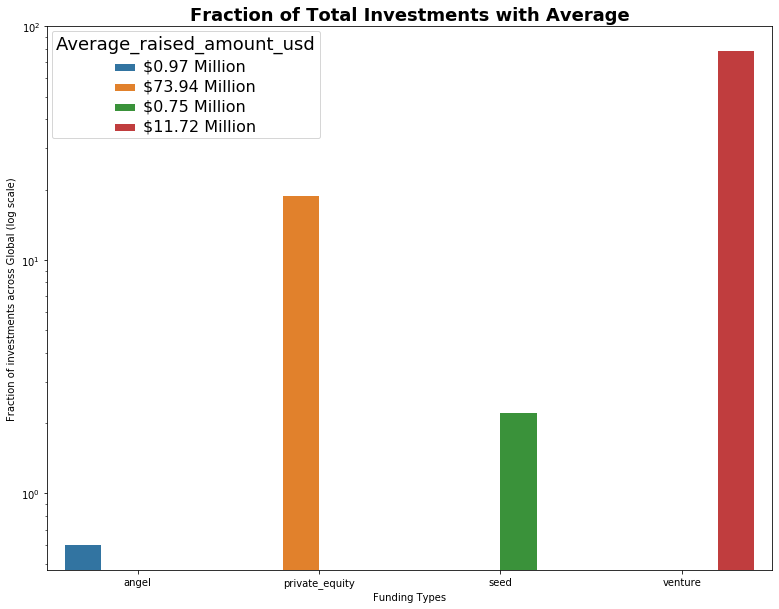

In [85]:
plt.figure(figsize=[13,10])
# Creating a barplot with average amount as hue, and percentage of investment across y-axis
bar_plot = sns.barplot(x='funding_round_type',y='percentage',hue="Average_raised_amount_usd", data=total_investment_per)
bar_plot.set(xlabel='Funding Types', ylabel='Fraction of investments across Global (log scale)')

# Custom Style
sns.set(font_scale = 1)
bar_plot.set_yscale("log")
plt.title("Fraction of Total Investments with Average", weight='bold').set_fontsize('18')
plt.setp(bar_plot.get_legend().get_texts(), fontsize='16')
plt.setp(bar_plot.get_legend().get_title(), fontsize='18')
plt.show()

Plot 2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [86]:
# Converted the total amount to billions for better representation
top9.raised_amount_usd = top9.raised_amount_usd.apply(lambda x: x / 1000)

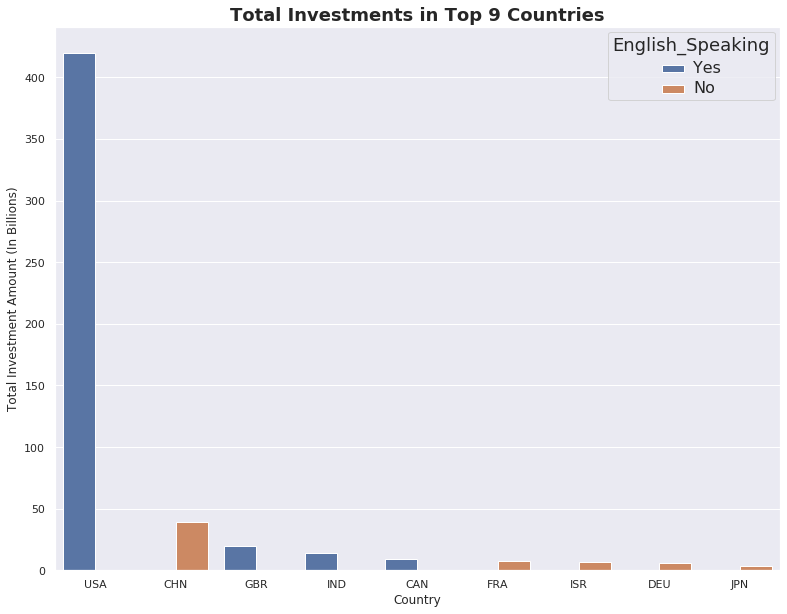

In [87]:
plt.figure(figsize=[13,10])
# Creating a barplot with average amount as hue, and percentage of investment across y-axis
bar_plot = sns.barplot(x="country_code", y="raised_amount_usd", data=top9, hue="English_Speaking")
bar_plot.set(xlabel='Country', ylabel='Total Investment Amount (In Billions)')

# Custom Style
sns.set(font_scale=1)
plt.title("Total Investments in Top 9 Countries", weight='bold').set_fontsize('18')
plt.setp(bar_plot.get_legend().get_texts(), fontsize='16')
plt.setp(bar_plot.get_legend().get_title(), fontsize='18')
plt.show()

Plot 3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [88]:
# Filtering the master_frame to contain only investments between 5 and 15 million USD
investment_sector = master_frame[master_frame.raised_amount_usd.between(5, 15)]

# Perform a groupby on country_code, main_sector level and get the total investment count
country_sector_gp = investment_sector.groupby(by=["country_code", "main_sector"]).agg({"main_sector": "count"}).rename(columns={"main_sector": "Total"})
# Perform another groupby operation on already grouped data and get the top 3 sectors by country
investment_country_sec_gp = country_sector_gp["Total"].groupby(level=0, group_keys=False).nlargest(3).reset_index()

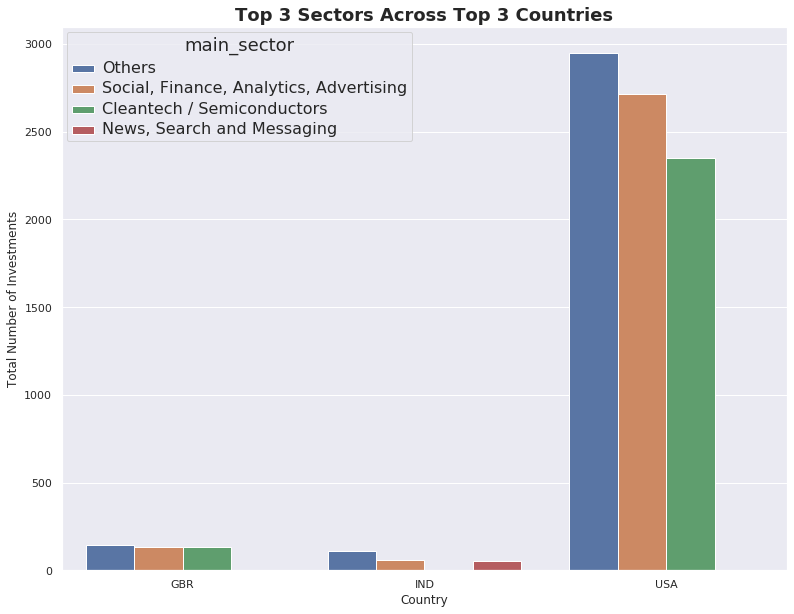

In [89]:
plt.figure(figsize=[13,10])
# Creating a barplot with main_sector as hue, and Total investment across y-axis
bar_plot = sns.barplot(x="country_code", y="Total", hue="main_sector", data=investment_country_sec_gp)
bar_plot.set(xlabel='Country', ylabel='Total Number of Investments')

# Custom Style
sns.set(font_scale=1)
plt.title("Top 3 Sectors Across Top 3 Countries", weight='bold').set_fontsize('18')
plt.setp(bar_plot.get_legend().get_texts(), fontsize='16')
plt.setp(bar_plot.get_legend().get_title(), fontsize='18')

plt.show()

***

### Conclusion

Based on the analysis, Sparks Funds should make their investment in;
- Best Sectors: **Others** & **Social, Finance, Analytics, Advertising**
- Best Countires: **USA**, **United Kingdom** and **India**
- Suitable Investment Type: **Venture**